In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
# Get list of columns from table
# Resource: https://stackoverflow.com/questions/21310549/list-database-tables-with-sqlalchemy

from sqlalchemy import inspect
inspector = inspect(engine)

for table_name in inspector.get_table_names():
   for column in inspector.get_columns(table_name):
       print("Column: %s" % column['name'])

Column: id
Column: station
Column: date
Column: prcp
Column: tobs
Column: id
Column: station
Column: name
Column: latitude
Column: longitude
Column: elevation


## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

# create variable to store results of query
june_results = []

# create query using extract function
# Resource: https://stackoverflow.com/questions/51451768/sqlalchemy-querying-with-datetime-columns-to-filter-by-month-day-year
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()


In [7]:
#  3. Convert the June temperatures to a list.
june_temps = list(june_results)


In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps,columns=['date','temperature'])
june_temps_df.set_index(june_temps_df['date'], inplace=True)
june_temps_df = june_temps_df.sort_index()
june_temps_df

,date,temperature
date,,
2010-06-01,2010-06-01,78.0
2010-06-01,2010-06-01,73.0
2010-06-01,2010-06-01,77.0
2010-06-01,2010-06-01,69.0
2010-06-01,2010-06-01,76.0
...,...,...
2017-06-30,2017-06-30,76.0
2017-06-30,2017-06-30,75.0
2017-06-30,2017-06-30,75.0


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# create variable to store results of query
dec_results = []

# create query
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()


In [11]:
# 7. Convert the December temperatures to a list.
dec_temps = list(dec_results)

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['date','temperature'])
dec_temps_df.set_index(dec_temps_df['date'], inplace=True)
dec_temps_df = dec_temps_df.sort_index()
dec_temps_df

,date,temperature
date,,
2010-12-01,2010-12-01,76.0
2010-12-01,2010-12-01,73.0
2010-12-01,2010-12-01,72.0
2010-12-01,2010-12-01,78.0
2010-12-01,2010-12-01,72.0
...,...,...
2016-12-31,2016-12-31,67.0
2016-12-31,2016-12-31,72.0
2016-12-31,2016-12-31,66.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional query for June

Historical precipitation data for month of June

In [14]:
# create variable to store results of query
june_prcp_results = []

# create query
june_prcp_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).all()


In [15]:
# Convert the June precipitation to a list.
june_pcrps = list(june_prcp_results)

In [16]:
# Create a DataFrame from the list of precipitation data for the month of June. 
june_pcrps_df = pd.DataFrame(june_pcrps, columns=['date','precipitation'])
june_pcrps_df.set_index(june_pcrps_df['date'], inplace=True)
june_pcrps_df = june_pcrps_df.sort_index()
june_pcrps_df

,date,precipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,0.01
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,NaN
2010-06-01,2010-06-01,0.03
...,...,...
2017-06-30,2017-06-30,0.01
2017-06-30,2017-06-30,0.08
2017-06-30,2017-06-30,0.07


In [17]:
# Get descriptive statistics
june_pcrps_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


(0.0, 5.0)

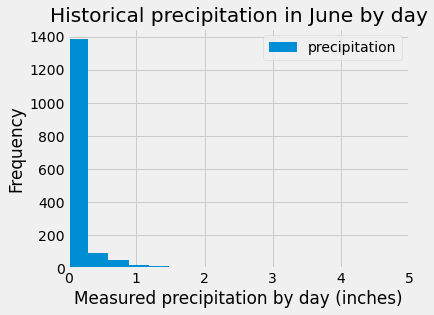

In [18]:
june_pcrps_df.plot.hist(bins = 15)
plt.tight_layout()
plt.title("Historical precipitation in June by day")
plt.xlabel("Measured precipitation by day (inches)")
plt.xlim(0,5)

In [30]:
june_prcp_zero_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).filter(Measurement.prcp < 0.01).all()
len(list(june_prcp_zero_results))


647

In [31]:
jun_prcp_heavy_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).filter(Measurement.prcp > 1.0).all()
len(list(jun_prcp_heavy_results))

37

## Additional query for December
Historical precipitation data for December

In [20]:
# create variable to store results of query
dec_prcp_results = []

# create query
dec_prcp_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).all()


In [21]:
# Convert the June precipitation to a list.
dec_pcrps = list(dec_prcp_results)

In [22]:
# Create a DataFrame from the list of precipitation data for the month of June. 
dec_pcrps_df = pd.DataFrame(dec_pcrps, columns=['date','precipitation'])
dec_pcrps_df.set_index(dec_pcrps_df['date'], inplace=True)
dec_pcrps_df = dec_pcrps_df.sort_index()
dec_pcrps_df

,date,precipitation
date,,
2010-12-01,2010-12-01,0.04
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,0.70
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,1.35
...,...,...
2016-12-31,2016-12-31,0.25
2016-12-31,2016-12-31,0.36
2016-12-31,2016-12-31,0.01


In [23]:
# Get descriptive statistics
dec_pcrps_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


(0.0, 7.0)

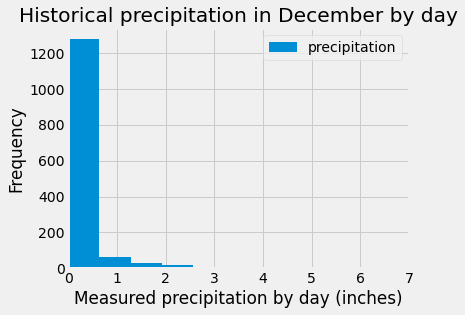

In [27]:
dec_pcrps_df.plot.hist()
plt.tight_layout()
plt.title("Historical precipitation in December by day")
plt.xlabel("Measured precipitation by day (inches)")
plt.xlim(0,7)

In [25]:
dec_prcp_zero_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).filter(Measurement.prcp < 0.01).all()
len(list(dec_prcp_zero_results))

510

In [29]:
dec_prcp_heavy_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).filter(Measurement.prcp > 1.0).all()
len(list(dec_prcp_heavy_results))

87